In [4]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [5]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
'''Funções que serão utilizadas para testar os diferentes algoritmos'''
def func(l):
    x = l[0]
    y = l[1]
    return np.array(10*(x)**2 + 13*np.sin(3*y)+ 15*np.cos(3*x) + y**2)

def der_func(l):
    x=l[0]
    y=l[1]
    return np.array([20*x + (-45*np.sin(3*x)), 39*np.cos(3*y) + 2*y])
es_func = func([X,Y])

def ackley(coor, a=20, b=0.2, c=2 * np.pi):
    x=coor[0]
    y=coor[1]
    f = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(
        c * x) + np.cos(c * y))) + a + np.exp(1)
    return np.array(f)

def der_ackley(coor, a=20, b=0.2, c=2 * np.pi):
    x=coor[0]
    y=coor[1]
    df_dx = a * b * x * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2))) / np.sqrt(
        0.5 * (x**2 + y**2)) + 0.5 * c * np.sin(c * x) * np.exp(0.5 * (np.cos(
            c * x) + np.cos(c * y)))
    df_dy = a * b * y * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2))) / np.sqrt(
        0.5 * (x**2 + y**2)) + 0.5 * c * np.sin(c * y) * np.exp(0.5 * (np.cos(
            c * x) + np.cos(c * y)))
    return np.array([df_dx, df_dy])
es_ackley = ackley([X,Y])

def himmelblau(coor):
    x=coor[0]
    y=coor[1]
    f = (x**2 + y - 11)**2 + (x + y**2 - 7)**2
    return np.array(f)

def der_himmelblau(coor):
    x=coor[0]
    y=coor[1]
    df_dx = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    df_dy = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([df_dx, df_dy])
es_himmelblau = himmelblau([X,Y])

def levy(coor):
    x=coor[0]
    y=coor[1]
    w = 1 + (x - 1) / 4
    f = np.sin(np.pi * w)**2 + (w - 1)**2 * (1 + np.sin(2 * np.pi * y)**2) + (
        w - 1)**2 * (1 + np.sin(2 * np.pi * x)**2)
    return np.array(f)

def dev_levy(coor):
    x=coor[0]
    y=coor[1]
    w = 1 + (x - 1) / 4
    df_dx = 2 * (w - 1) * np.sin(2 * np.pi * x) * np.cos(2 * np.pi * x) + (
        np.pi * np.cos(np.pi * w) * (w - 1)) / 2
    df_dy = 2 * (w - 1) * np.sin(2 * np.pi * y) * np.cos(
        2 * np.pi * y) + 2 * np.pi * (w - 1) * np.sin(2 * np.pi * y) * np.cos(
            2 * np.pi * y)
    return np.array([df_dx, df_dy])
es_levy = levy([X,Y])

# Função usada para plotar as funções otimizadas
def plot(pnt_func, pnt_ackley, pnt_levy, pnt_himmelblau):
    figure, axis = plt.subplots(2, 2, figsize=(10,10)) 

    fig1 = axis[0,0].contourf(X, Y, es_func, 10, cmap='magma')
    axis[0,0].set_title('func')
    axis[0,0].plot(pnt_func[0], pnt_func[1], "o", color='white')
    figure.colorbar(fig1, ax=axis[0,0])

    fig2 = axis[1,0].contourf(X, Y, es_ackley, 10, cmap='magma')
    axis[1,0].set_title('ackley')
    axis[1,0].plot(pnt_ackley[0], pnt_ackley[1], "o", color='white')
    figure.colorbar(fig2, ax=axis[1,0])

    fig3 = axis[0,1].contourf(X, Y, es_levy, 10, cmap='magma')
    axis[0,1].set_title('levy')
    axis[0,1].plot(pnt_levy[0], pnt_levy[1], "o", color='white')
    figure.colorbar(fig3, ax=axis[0,1])

    fig4 = axis[1,1].contourf(X, Y, es_himmelblau, 10, cmap='magma')
    axis[1,1].set_title('himmelblau')
    axis[1,1].plot(pnt_himmelblau[0], pnt_himmelblau[1], "o", color='white')
    figure.colorbar(fig4, ax=axis[1,1])

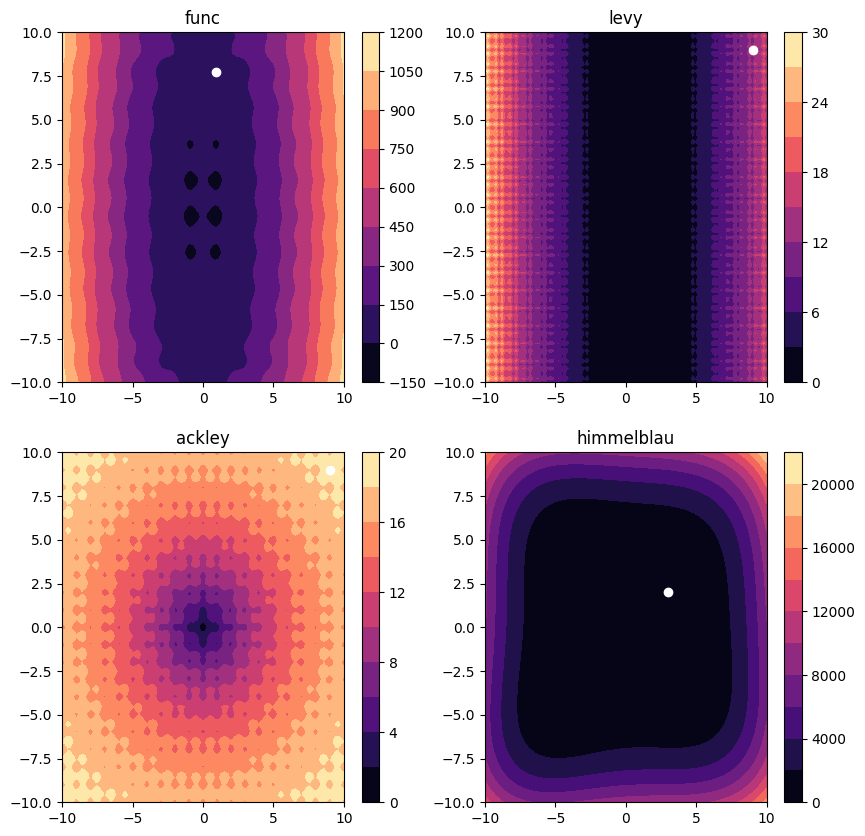

In [6]:
def gradient_descent(f, f_dev, x, step):
    while True:
        d = -(f_dev(x)/np.linalg.norm(f_dev(x)))
        x_k = x + step*d
        if f(x_k) <= f(x):
            x = x_k
        else:
            return x

point_func = gradient_descent(func, der_func, [9,9], 0.001)
point_levy = gradient_descent(levy, dev_levy, [9,9], 0.001)
point_himmelblau = gradient_descent(himmelblau, der_himmelblau, [9,9], 0.001)
point_ackley = gradient_descent(ackley, der_ackley, [9,9], 0.001)
plot(point_func, point_ackley, point_levy, point_himmelblau)